# Mandatory 1 
Karl Jacobsen<br>

Importing modules.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set(style="white", context="notebook", font_scale=1.5,
            rc={"axes.grid": True, "legend.frameon": False,
"lines.markeredgewidth": 1.4, "lines.markersize": 10})
import itertools as it
import pandas as pd
import time
import random

# Data handling
The data is imported from a public available GitHub repository using Pandas.

In [2]:
# Import data
#df = pd.read_csv( "european_cities.csv", sep=';')
path = 'https://raw.githubusercontent.com/kaaja/BIC/master/m1/cityData.csv'
df = pd.read_csv( path, sep=';')
print(df)

    Barcelona  Belgrade   Berlin  Brussels  Bucharest  Budapest  Copenhagen  \
0        0.00   1528.13  1497.61   1062.89    1968.42   1498.79     1757.54   
1     1528.13      0.00   999.25   1372.59     447.34    316.41     1327.24   
2     1497.61    999.25     0.00    651.62    1293.40    689.06      354.03   
3     1062.89   1372.59   651.62      0.00    1769.69   1131.52      766.67   
4     1968.42    447.34  1293.40   1769.69       0.00    639.77     1571.54   
5     1498.79    316.41   689.06   1131.52     639.77      0.00     1011.31   
6     1757.54   1327.24   354.03    766.67    1571.54   1011.31        0.00   
7     1469.29   2145.39  1315.16    773.20    2534.72   1894.95     1238.38   
8     1471.78   1229.93   254.51    489.76    1544.17    927.92      287.97   
9     2230.42    809.48  1735.01   2178.85     445.62   1064.76     2017.17   
10    2391.06    976.02  1204.00   1836.20     744.44    894.29     1326.33   
11    1137.67   1688.97   929.97    318.72    2088.4

In [3]:
# Create city name array
cityNames = np.asarray(list(df))
print('Test: Print first 3 cities ',cityNames[0:3])

Test: Print first 3 cities  ['Barcelona' 'Belgrade' 'Berlin']


# Exhaustive search 
## The solver class
The following code is the class that does the exhaustive search for user given cities.

In [4]:
class Exhaustive:
    def __init__(self):
        return None
    
    def exhaustive(self, cities):
        startTime = time.time()
        alternativesTemporary = list(it.permutations(cities[1:], len(cities) - 1)) # Leave out 1st city as trick
        alternatives = []
        for i in range(len(alternativesTemporary)):
            templist = [cities[0]]
            for j in range(len(alternativesTemporary[0])):
                templist.append(alternativesTemporary[i][j])
            templist.append(templist[0])
            alternatives.append(templist)
            
        bestSolutionLength = 1e9
        for alternative in alternatives:
            length = 0
            for city1, city2 in zip(alternative[:-1], alternative[1:]):
                indexNumberCity2 = np.concatenate(np.where(cityNames == city2))                
                length += df[city1][indexNumberCity2].values                
        
            if length < bestSolutionLength:
                bestSolutionLength = length
                bestSolution = alternative
        endTime = time.time()
        timeUsed = endTime - startTime

        return bestSolution, bestSolutionLength, timeUsed
    
    def calculateDistance(self, cityOrder):
        distanceTravelled = 0
        for loopCounter, cityNumber in zip(range(len(cityOrder[:-1])), cityOrder[:-1]):
            distanceTravelled += df[cityNames[cityNumber]][cityOrder[loopCounter+1]]
        distanceTravelled += df[cityNames[cityOrder[loopCounter+1]]][cityOrder[0]]
        return distanceTravelled

## Exhaustive search: The problem class.
The following class applies the above class for solving the problem with exhaustive search, and produce the optimal solutions for all the $i$ first cities, $i = 1, 2, ...,10$. Also a plot of the logarithm of the timed used for the different solutions is produced.

In [5]:
class problemExhaustive:
    def __init__(self, maxNumberOfCities):
        self.maxNumberOfCities = maxNumberOfCities
        
    def solve(self):
        self.cityNumbers = []
        self.times = []
        for numberOfCities in range(2, self.maxNumberOfCities+1):
            self.cityNumbers.append(numberOfCities)
            firstCities = numberOfCities
            cities = cityNames[0:firstCities]
            a = Exhaustive()
            sol, length, timeUsed = a.exhaustive(cities)
            print(' Number of cities: ', numberOfCities, '\n Solution', sol, '\n Distance', length, '\n Time ', timeUsed, '\n')
            self.times.append(timeUsed)
            
    def plot(self):
        fig, ax = plt.subplots()
        ax.plot(self.cityNumbers, np.log(self.times))
        ax.set_ylabel(r'$log Times$')
        ax.set_xlabel('Number of cities')

## Exhaustive search: Solution
The following code applies the above two classes and solves the problem.

 Number of cities:  2 
 Solution ['Barcelona', 'Belgrade', 'Barcelona'] 
 Distance [3056.26] 
 Time  0.0015566349029541016 

 Number of cities:  3 
 Solution ['Barcelona', 'Belgrade', 'Berlin', 'Barcelona'] 
 Distance [4024.99] 
 Time  0.003136157989501953 

 Number of cities:  4 
 Solution ['Barcelona', 'Belgrade', 'Berlin', 'Brussels', 'Barcelona'] 
 Distance [4241.89] 
 Time  0.012015104293823242 

 Number of cities:  5 
 Solution ['Barcelona', 'Belgrade', 'Bucharest', 'Berlin', 'Brussels', 'Barcelona'] 
 Distance [4983.38] 
 Time  0.05243659019470215 

 Number of cities:  6 
 Solution ['Barcelona', 'Belgrade', 'Bucharest', 'Budapest', 'Berlin', 'Brussels', 'Barcelona'] 
 Distance [5018.81] 
 Time  0.2873666286468506 

 Number of cities:  7 
 Solution ['Barcelona', 'Belgrade', 'Bucharest', 'Budapest', 'Berlin', 'Copenhagen', 'Brussels', 'Barcelona'] 
 Distance [5487.89] 
 Time  2.0296661853790283 

 Number of cities:  8 
 Solution ['Barcelona', 'Belgrade', 'Bucharest', 'Budapest', '

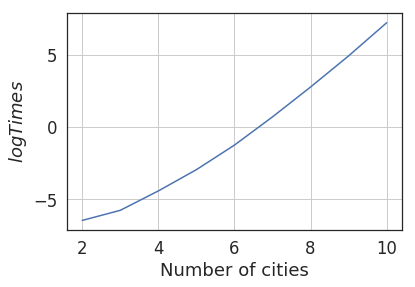

In [6]:
maxNumberOfCities = 10
exhaustive = problemExhaustive(maxNumberOfCities)
exhaustive.solve()
exhaustive.plot()

The simulation time quickly increases, with 26 minutes for 10 cities, and the plot above suggests that the simulation time is exponential in the number of cities. To able to predict the simulation time for larger values, we make a least squares estimation of cities on the logarithm of the simulation time.

In [7]:
# Prediction of time when 20 cities
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error, mean_absolute_error

# Storing some data from run above
cityNumbersExhaustive = exhaustive.cityNumbers
timesExhaustive = exhaustive.times

linreg = LinearRegression()
x = np.asarray(cityNumbersExhaustive)
x=x[:,np.newaxis]
y = np.asarray(np.log(timesExhaustive))
XHat = np.c_[ x]
linreg.fit(XHat, y)
yPredictTraining = linreg.predict(x)
R2 = r2_score(y, yPredictTraining)

# Prediction
cityPredictor = 24
yPredict20Cities = linreg.predict(cityPredictor)
yPredictSeconds = np.exp(yPredict20Cities)
yPredictYears = yPredictSeconds/(60.*60*24*365*1e6)
print('Predicted solution time 24 cities: ', yPredictYears, 'million years. \n')
print('Training R2 score: %.3f' % R2)

Predicted solution time 24 cities:  [0.82827506] million years. 

Training R2 score: 0.983


According to the above estimation result, it would take about a million years to simulate the optimal soultion for 24 cities using the exhaustive search algorithm from above.

# Hill climbing
The implemented hill climbing algorithm swaps two random cities and computes the new distance. If the new distance from the city swap is lower than the previous distance, the new city compbination is kept. On the other hand, if the new distance from the city swap is larger than the previous distance, the new city compbination is not kept. This procedure is continued for a user given number of iterations.

## Hill climbing: The solver class
The following code show the implemented hill climber algorithm, which is implemented by a function taking the number of cities and the number of steps as inputs.

In [8]:
class HillClimber: 
    import numpy as np

    def __init__(self, nCities, numberOfSimulations):
        self.nCities, self.numberOfSimulations = nCities, numberOfSimulations
        self.cityOrder = np.arange(nCities)
        self.np.random.shuffle(self.cityOrder)

    def calculateDistance(self, cityOrder):
        distanceTravelled = 0
        for loopCounter, cityNumber in zip(range(len(cityOrder[:-1])), cityOrder[:-1]):
            distanceTravelled += df[cityNames[cityNumber]][cityOrder[loopCounter+1]]
        distanceTravelled += df[cityNames[cityOrder[loopCounter+1]]][cityOrder[0]]
        return distanceTravelled

    
    def simulate(self):
        distanceTravelled = self.calculateDistance(self.cityOrder)
        for i in range(self.numberOfSimulations):
            city1, city2 = random.sample(set(range(self.nCities)), 2)
            possibleCityOrder = self.cityOrder.copy()
            possibleCityOrder = np.where(possibleCityOrder==city1, -1, possibleCityOrder)
            possibleCityOrder = np.where(possibleCityOrder==city2, city1, possibleCityOrder)
            possibleCityOrder = np.where(possibleCityOrder==-1, city2, possibleCityOrder)
            newDistanceTravelled = self.calculateDistance(possibleCityOrder)

            if newDistanceTravelled < distanceTravelled:
                distanceTravelled = newDistanceTravelled
                self.cityOrder = possibleCityOrder
        return cityNames[self.cityOrder], distanceTravelled

## Hill climbing: The problem class
The following code displays the problem class, which take user given input, solves the problem and prints the results.

In [9]:
class hillclimberProblem:
    
    def __init__(self, maxNumberOfCitiesList, numberOfSimulations, numberOfRuns):
        self.maxNumberOfCitiesList, self.numberOfSimulations, self.numberOfRuns = \
        maxNumberOfCitiesList, numberOfSimulations, numberOfRuns
    
    def solve(self):
        for numberOfCities in self.maxNumberOfCitiesList:
            routes = []
            distances = np.zeros(self.numberOfRuns)

            for i in range(self.numberOfRuns):
                hc = HillClimber(numberOfCities, self.numberOfSimulations)
                route, distance = hc.simulate()
                routes.append(route)
                distances[i] = distance

            print('Number of simulations: ', self.numberOfSimulations)
            print('Number of cities: ', numberOfCities)
            minDistance = np.min(distances)
            print('Minimum ', minDistance)
            maxDistance = np.max(distances)
            print('Maximum ', maxDistance)
            meanDistance = np.mean(distances)
            print('Mean ', meanDistance)
            stdDistance = np.std(distances)
            print('Std ', stdDistance)

            minDistanceIndex = np.concatenate(np.argwhere(distances == minDistance))
            print('Best route: ', routes[minDistanceIndex[0]], '\n')

## Hill climber: Solution
The following code applies the above two classes and solves the 10 and 24 cities problems using 165 "climbs". The number 165 is chosen for comparison with GA algorithm results coming later.

In [23]:
# Variables to play with
np.random.seed(1)
maxNumberOfCitiesList = [10, 24]
numberOfSimulations = 165
numberOfRuns = 20

# Solving by calling on problem class
hc = hillclimberProblem(maxNumberOfCitiesList, numberOfSimulations, numberOfRuns)
hc.solve()

Number of simulations:  165
Number of cities:  10
Minimum  7486.309999999999
Maximum  8391.05
Mean  7730.8685
Std  285.07071137307315
Best route:  ['Copenhagen' 'Hamburg' 'Brussels' 'Dublin' 'Barcelona' 'Belgrade'
 'Istanbul' 'Bucharest' 'Budapest' 'Berlin'] 

Number of simulations:  165
Number of cities:  24
Minimum  15636.380000000001
Maximum  21229.869999999995
Mean  18605.516000000003
Std  1333.674382746403
Best route:  ['Budapest' 'Rome' 'Sofia' 'Istanbul' 'Bucharest' 'Kiev' 'Moscow'
 'Stockholm' 'Saint Petersburg' 'Warsaw' 'Berlin' 'Hamburg' 'Copenhagen'
 'Munich' 'Brussels' 'London' 'Paris' 'Dublin' 'Madrid' 'Barcelona'
 'Milan' 'Vienna' 'Prague' 'Belgrade'] 



## Hillclimber: Interpretation of solution
For ten cities, the optimal solution is reached in at least one simulation, and the mean is about 5 per cent higher. This is better than one simulation results with the basic GA reported later.  <br>

The hill climber solved both 10 and 24 cities together in about 1 second. In comparison the exhaustive search would have used one million years on this, and the exhaustive searched used 23 minutes on the 10 cities problem. <br>

We note that the results depend on the nummer of inner simulations applied in the hillclimber function. This is a different variable than total number of runs. Increasing the number of inner simulations, the standard deviation would decrease.

# GA and hybdrid models
Some info about the algorithms: <br>

__Initialization__: Random.<br>
__Parent selection:__ Uniform selection. A user-given per centage of the population is chosen as potential parents by random drawings from the uniform pdf (pobability distribution function). From the chosen potential parents, random pairs of 2 parents without replacement is used. Each parent pair gets one child. The uniform selection procedure increases the chances of exploration. <br>
__Mutation:__ Possibility of a single random swap for each child. <br>
__Recombination__: Order crossover. Order crossover is chosen since we are dealing with mutations and conservation of relative order is valued. The start and stop position of the area where the genes are presever equals half the genotype length +- 2. About 50 per cent of the gene is subject to change in the 10 city cases, while this percentage is much lower in the 24 cities cases. <br>
__Survival selecation:__ Steady state (constant population size). Elitism: only best individuals among old population and parents survives. The choise of elitism, which is exploitative, balances the choise of uniform parent selection, which is explorative.<br>

__Hybdrid model specific info:__<br>
For the hybrid models, which includes a hill climbing algorith, 4 new combinations are tried for each child. The new combinations are in form of single city swaps, supporting the goal of this part of the algorithm being exploitative. <br>

## GA and hybrid: The solver class
The following code is the class for the GA algorithm and the hybrid models. 

In [11]:
class GA:
    
    def __init__(self, populationSize, numberOfCities, parentShare, mutation=False,  hybrid=False):
        self.populationSize, self.numberOfCities, self.hybrid, self.parentShare = \
        populationSize, numberOfCities, hybrid, parentShare
        self.population = np.zeros((self.populationSize, self.numberOfCities))
        
        for counter in range(self.populationSize):
            self.population[counter][:] = np.arange(self.numberOfCities)
            np.random.shuffle(self.population[counter][:])
        
    def simulate(self, numberOfGenerations):
        generationBest = []
        for counter in range(numberOfGenerations):
            parentShare = .5
            self.pairs = self.parentSelection()
            children = self.orderCrossover(self.pairs)
            if mutation:
                self.mutate()
            self.population, distances, self.bestIndividual, minimumValue, bestIndividualNames = \
            self.survivalSelection()
            generationBest.append(minimumValue)
        return self.population, distances, self.bestIndividual, minimumValue, bestIndividualNames, generationBest
      
    def parentSelection(self, parentSelectionType='random'):
        if parentSelectionType == 'random':
            self.potentialParentsIndices = random.sample(set(range(self.populationSize)), \
                                                         int(round(self.parentShare*self.populationSize)))
        self.potentialParents = self.population[self.potentialParentsIndices ][:]
        self.pairIndices = []
        for counter in range(len(self.potentialParentsIndices)):
            self.pairIndices.append(random.sample(set(self.potentialParentsIndices), 2))
            
        return self.pairIndices  
    
    def orderCrossover(self, parents):
        self.children = np.zeros((len(parents), self.numberOfCities))
        for childCounter in range(len(parents)):
            p1, p2 = self.population[parents[childCounter][0]][:], self.population[parents[childCounter][1]][:]#np.asarray(parents[0]), np.asarray(parents[1])
            p1, p2 = np.asarray(p1), np.asarray(p2)
            startPosition, stopPosition = int(np.round(self.numberOfCities/2-2)), int(np.round(self.numberOfCities/2+2))

            c = np.zeros(len(p1))
            c[startPosition:stopPosition] = p1[startPosition:stopPosition]
            indexArray = list(range(len(c)))
            remainingPositions = indexArray[stopPosition:] + indexArray[0:startPosition]
            coveredPositions = list(np.arange(startPosition, stopPosition))
            p2TryIndices =  remainingPositions + coveredPositions

            newPositionNumber = 0
            for position in remainingPositions:
                tryIndex = newPositionNumber
                while p2[p2TryIndices[tryIndex]] in c and (tryIndex + 1) < len(p2TryIndices):
                    tryIndex += 1
                if p2[p2TryIndices[tryIndex]] not in c:
                    c[position] = p2[p2TryIndices[tryIndex]] 
                newPositionNumber +=1
            self.children[childCounter][:] = c
        return self.children
    
    def mutate(self):
        numberOfChildren = np.shape(self.children)[0]
        for child in range(numberOfChildren):
            city1, city2 = random.sample(set(range(self.numberOfCities)), 2)
            possibleCityOrder = self.children[child,:].copy()
            possibleCityOrder = np.where(possibleCityOrder==city1, -1, possibleCityOrder)
            possibleCityOrder = np.where(possibleCityOrder==city2, city1, possibleCityOrder)
            possibleCityOrder = np.where(possibleCityOrder==-1, city2, possibleCityOrder)
            self.children[child,:] = possibleCityOrder
    
    def survivalSelection(self):
        if self.hybrid:
            self.numberOfTries = 4 # For hillclimber
            numberOfChildren = np.shape(self.children)[0]
            modifiedChildren = np.zeros((numberOfChildren, self.numberOfCities ))
            distanceModifiedChild = np.zeros(numberOfChildren)
            for child in range(numberOfChildren):
                modifiedChildren[child,:], distanceModifiedChild[child] = \
                self.hillclimber(self.numberOfTries, self.children[child,:])

            if self.hybrid == 'Lamarck':
                self.children = modifiedChildren
        
            totalPopulationBaldwin = np.concatenate((self.population, modifiedChildren), 0)
        
        totalPopulation = np.concatenate((self.population, self.children), 0)        
        totalPopulationSize = np.shape(totalPopulation)[0]
        distances = []
        for individuals in range(totalPopulationSize):
            cityOrder = np.asarray(totalPopulation[individuals])
            distanceTravelled = 0
            for loopCounter, cityNumber in zip(range(len(cityOrder[:-1])), cityOrder[:-1]):
                distanceTravelled += df[cityNames[int(cityNumber)]][cityOrder[loopCounter+1]]
            distanceTravelled += df[cityNames[int(cityOrder[loopCounter+1])]][int(cityOrder[0])]
            distances.append(distanceTravelled)
            
        if self.hybrid == 'Baldwin':
            distancesBaldwin = []
            for individuals in range(totalPopulationSize):
                cityOrder = np.asarray(totalPopulationBaldwin[individuals])
                distanceTravelled = 0
                for loopCounter, cityNumber in zip(range(len(cityOrder[:-1])), cityOrder[:-1]):
                    distanceTravelled += df[cityNames[int(cityNumber)]][cityOrder[loopCounter+1]]
                distanceTravelled += df[cityNames[int(cityOrder[loopCounter+1])]][int(cityOrder[0])]
                distancesBaldwin.append(distanceTravelled)

            order = np.asarray(distancesBaldwin).argsort()
            ranks = order.argsort()
            minimumIndexBaldwin = np.where(ranks == 0)
        
        order = np.asarray(distances).argsort()
        ranks = order.argsort()
        surviverIndices = np.where(ranks < self.populationSize)
        minimumIndex = np.where(ranks == 0)

        self.population = totalPopulation[surviverIndices]
        self.bestIndividual = np.concatenate(totalPopulation[minimumIndex])
        self.bestIndividual  = self.bestIndividual.astype(int)
        bestIndividualNames = cityNames[self.bestIndividual]
        
        distances = np.asarray(distances)
        minimumValue = distances[minimumIndex]
        distances = distances[surviverIndices]

        if self.hybrid == 'Baldwin':
            minimumIndexBaldwin2 = np.concatenate(minimumIndexBaldwin)[0]
            minimumValue = distancesBaldwin[minimumIndexBaldwin2]
            self.bestIndividual = np.concatenate(totalPopulationBaldwin[minimumIndexBaldwin])
        
        return self.population, distances, self.bestIndividual, minimumValue, bestIndividualNames
    
    def hillclimber(self, numberOfTries, cityOrder):
        distanceTravelled = self.calculateDistance(cityOrder)
        nCities = self.numberOfCities
        for i in range(numberOfTries):
            city1, city2 = random.sample(set(range(nCities)), 2)
            possibleCityOrder = cityOrder.copy()
            possibleCityOrder = np.where(possibleCityOrder==city1, -1, possibleCityOrder)
            possibleCityOrder = np.where(possibleCityOrder==city2, city1, possibleCityOrder)
            possibleCityOrder = np.where(possibleCityOrder==-1, city2, possibleCityOrder)
            newDistanceTravelled = self.calculateDistance(possibleCityOrder)

            if newDistanceTravelled < distanceTravelled:
                distanceTravelled = newDistanceTravelled
                cityOrder = possibleCityOrder
        cityOrder = cityOrder.astype(int)
        return cityOrder, distanceTravelled

    def calculateDistance(self, cityOrder):
        """ For hillclimbing """
        distanceTravelled = 0
        for loopCounter, cityNumber in zip(range(len(cityOrder[:-1])), cityOrder[:-1]):
            distanceTravelled += df[cityNames[int(cityNumber)]][int(cityOrder[loopCounter+1])]
        distanceTravelled += df[cityNames[int(cityOrder[loopCounter+1])]][int(cityOrder[0])]
        return distanceTravelled

## GA and hybrid: The problem class
The following is the problem class, which takes in user given input specific to the problem, passes these specifics into the solver class (which solves the given problem) and creates prints and figures out of the results. 

In [12]:
class SolveProblem:
    def __init__(self, populationSizes, cityAlternatives, numberOfGenerations, runs, parentShare, \
                 mutation, models, plotType):
        if plotType == 'models':
            fig, ax = plt.subplots()
            legends = []
        for hybrid in models: 
            if hybrid == False:
                header = 'Standard GA'
            else:
                header = hybrid
                
            print('####################################', header, '###################################################')
            for numberOfCities in cityAlternatives:
                print('#Number of cities: ', numberOfCities)
                print('#Number of generations: ', numberOfGenerations, '\n')
                generationalAveragesAllPopulations = []
                
                if plotType == 'populations':
                    fig, ax = plt.subplots()
                    legends = []
                for populationSize in populationSizes:

                    smallesDistances = []
                    distances = []
                    bestTours = []

                    generationArray = np.zeros((runs, numberOfGenerations))
                    for runCounter in range(runs):
                        ga2 = GA(populationSize, numberOfCities, parentShare, mutation, hybrid)
                        survivalPopulation, distancesOrg, bestIndividual, minimumValue, bestIndividualNames, \
                        generationBest = ga2.simulate(numberOfGenerations)
                        for generations in range(numberOfGenerations):
                            generationArray[runCounter][generations] = generationBest[generations]
                        distances.append(minimumValue)
                        bestTours.append(bestIndividualNames)

                    generationalAverageOverRuns = np.zeros(numberOfGenerations)
                    for generation in range(numberOfGenerations):
                        generationalAverageOverRuns[generation] = np.average(generationArray[:,generation])
                    generationalAveragesAllPopulations.append(generationalAverageOverRuns)
                    
                    print('#PopulationSize: ', populationSize)
                    print('#Parent share: ', parentShare)
                    print('#Mutation: ', mutation)
                    minDistance = np.min(distances)
                    print('Minimum minimum over all runs ', minDistance)
                    maxDistance = np.max(distances)
                    print('Maximum minimum over all runs ', maxDistance)
                    meanDistance = np.mean(distances)
                    print('Mean minimum over all runs ', meanDistance)
                    stdDistance = np.std(distances)
                    print('Std minimum over all runs ', stdDistance)
                    
                    # For counting number of distance evaluations
                    if hybrid == False:
                        numberOfTries = 0 # If not jillclimbing, this is zero
                    else:
                        numberOfTries = ga2.numberOfTries
                    totalNumberOfDistanceEvaluations = populationSize + numberOfGenerations*(len(ga2.pairs)*\
                                                                                             (1 + numberOfTries))
                                                                                             
                    print('Number of Distance evaluations: ', totalNumberOfDistanceEvaluations)
                    minDistanceIndex = np.concatenate(np.argwhere(distances == minDistance))
                    print('Best route over all runs : \n', bestTours[minDistanceIndex[0]], '\n')    
                
                for populationSetting in range(len(populationSizes)):
                    ax.plot(np.arange(1, numberOfGenerations+1), generationalAveragesAllPopulations[populationSetting]), \
                           
                    if plotType == 'models':
                        if hybrid == False:
                            legends.append(header)    
                        else:
                            legends.append(hybrid)
                    elif plotType == 'populations':
                        legends.append(populationSizes[populationSetting])

                fig.legend(legends)
                ax.set_xlabel('Generations')
                ax.set_ylabel('Distance')
                if plotType == 'models':
                    ax.set_title('Models \n ParentShare %.2f' %parentShare)
                elif plotType == 'populations':
                    ax.set_title('Population comparison \n Model: %s' %header)

## Hybrid: Parameter tuning: parent share
The parent share of the population decides how many children that will be created. To optimize performance, we try setting this share so that the distances are minimized. This analysis is done for all hybrid models, including the standard GA. The number of generations are set to 40, so that the simulations with a low parent share, and hence few children, also can have a significant amount of distance evaluations. The low parent share simulations will always have fewer distance evaluations for a given generation compared to simulations with higher parent shares.<br>

A population size of 20 is used in all simulations. <br>

__Note to reader:__ Jump to the end of the report window below the following code, and there will be three figures.

#################################### Standard GA ###################################################
#Number of cities:  10
#Number of generations:  40 

#PopulationSize:  20
#Parent share:  0.25
#Mutation:  True
Minimum minimum over all runs  7503.1
Maximum minimum over all runs  8472.380000000001
Mean minimum over all runs  7996.213999999998
Std minimum over all runs  267.48283755037465
Number of Distance evaluations:  220
Best route over all runs : 
 ['Brussels' 'Dublin' 'Barcelona' 'Istanbul' 'Bucharest' 'Belgrade'
 'Budapest' 'Berlin' 'Copenhagen' 'Hamburg'] 

#################################### Lamarck ###################################################
#Number of cities:  10
#Number of generations:  40 

#PopulationSize:  20
#Parent share:  0.25
#Mutation:  True
Minimum minimum over all runs  7486.3099999999995
Maximum minimum over all runs  8159.7
Mean minimum over all runs  7663.7955
Std minimum over all runs  170.21837816390456
Number of Distance evaluations:  1020
Best rout

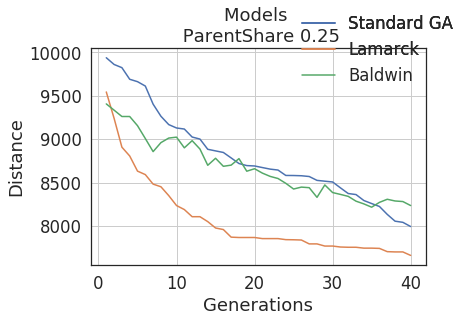

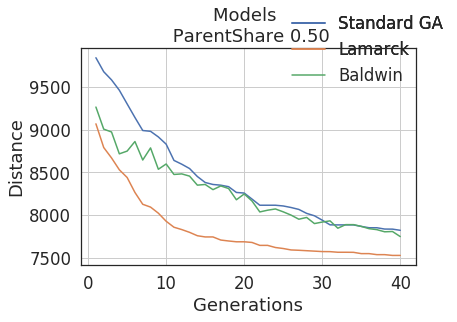

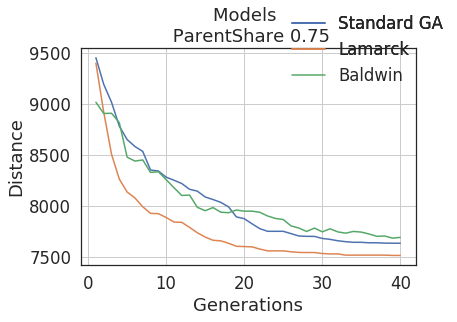

In [13]:
plotType = 'models'
populationSizes = [20]
cityAlternatives = [10]
numberOfGenerations = 40
runs = 20
parentShares = [.25, .5, .75]#, .75]
mutation = True
models = [False, 'Lamarck', 'Baldwin']
for parentShare in parentShares:
    problem1 = SolveProblem(populationSizes, cityAlternatives, numberOfGenerations, runs,\
                        parentShare, mutation, models, plotType)

### Hybrid, parent share, interpretation 
From the three figures above, we see that the higher parent share gives lower distance. Ignoring computational efficiency, a higher parent share is preffered for all models. We will apply a parent share of 75 per centage in the comming analysis.

## Hybrid. Mutation.
Here we will check the effect of having mutation in the different models. <br>

__Note to reader:__ Scroll to the bottom of the result window following the code to see figures summarizing the results.

#################################### Standard GA ###################################################
#Number of cities:  10
#Number of generations:  40 

#PopulationSize:  20
#Parent share:  0.75
#Mutation:  False
Minimum minimum over all runs  7915.150000000001
Maximum minimum over all runs  9800.89
Mean minimum over all runs  8905.621500000001
Std minimum over all runs  539.6487333096871
Number of Distance evaluations:  620
Best route over all runs : 
 ['Dublin' 'Brussels' 'Barcelona' 'Budapest' 'Belgrade' 'Istanbul'
 'Bucharest' 'Berlin' 'Copenhagen' 'Hamburg'] 

#################################### Lamarck ###################################################
#Number of cities:  10
#Number of generations:  40 

#PopulationSize:  20
#Parent share:  0.75
#Mutation:  False
Minimum minimum over all runs  7486.3099999999995
Maximum minimum over all runs  7503.1
Mean minimum over all runs  7488.828499999999
Std minimum over all runs  5.9952291657618435
Number of Distance evaluations:  3020

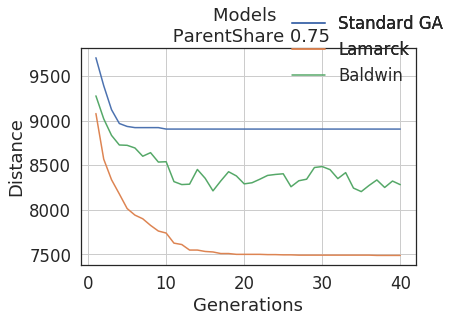

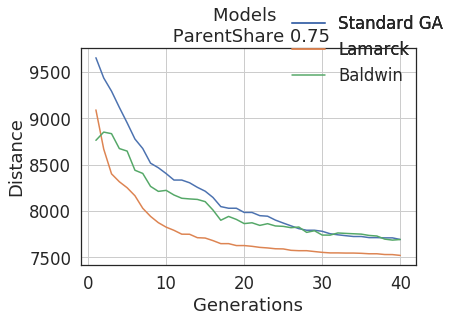

In [14]:
plotType = 'models'
populationSizes = [20]
cityAlternatives = [10]
numberOfGenerations = 40
runs = 20
parentShares = [.75]
mutations = [False, True]
models = [False, 'Lamarck', 'Baldwin']
for mutation in mutations:
    problem1 = SolveProblem(populationSizes, cityAlternatives, numberOfGenerations, runs,\
                        parentShare, mutation, models, plotType)

### Hybrid. Mutation. Interpretation.
The above two figures, where the last is with mutation, show the effect of mutation on fitness performance differs between the models. The standard GA and the Baldwin model both have a dramtic reduction in averagve best distance over 20 runs when mutation is included. The perormance of the Lamarck model, on the other hand, is worsened by mutation. <br>

The positive effect of mutation on the GA and Baldwin model seems to be escape from local extrema. From the first figure above, we see that both the GA and Baldwin model converges much more quickly to an equilibrium with higher bast distances in the absence of mutation. Mutation introduces some randomness, and even though there is only a flip between two cities, the change in distance can become large. <br>

The worsening performance of the Lamarck model in the presence of mutation can be explained by the fact that before the mutation the children will have found some local better conditions due to hill climbing. Mutation moves the solution away from these locally improved solutions. We finally note that the negative effect of mutation on the Lamarck models performance dies out when max number of generations is reached.<br>

In the following we choose to run with mutation, since two of the models did considerably better with mutation and the long term effect of mutation on the model that did worse is non-existent.

## Genetic algorithm: Population size analysis, 10 cities.
The following code solves the 10 city problem for different population sizes with standard GA using the above two classes.

#################################### Standard GA ###################################################
#Number of cities:  10
#Number of generations:  40 

#PopulationSize:  5
#Parent share:  0.75
#Mutation:  True
Minimum minimum over all runs  7486.3099999999995
Maximum minimum over all runs  8640.33
Mean minimum over all runs  7960.951000000001
Std minimum over all runs  356.7178569808358
Number of Distance evaluations:  165
Best route over all runs : 
 ['Hamburg' 'Brussels' 'Dublin' 'Barcelona' 'Belgrade' 'Istanbul'
 'Bucharest' 'Budapest' 'Berlin' 'Copenhagen'] 

#PopulationSize:  20
#Parent share:  0.75
#Mutation:  True
Minimum minimum over all runs  7486.3099999999995
Maximum minimum over all runs  8168.71
Mean minimum over all runs  7678.1995
Std minimum over all runs  177.21664161345015
Number of Distance evaluations:  620
Best route over all runs : 
 ['Hamburg' 'Brussels' 'Dublin' 'Barcelona' 'Belgrade' 'Istanbul'
 'Bucharest' 'Budapest' 'Berlin' 'Copenhagen'] 

#PopulationSize:

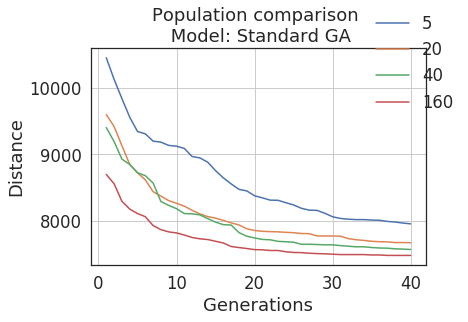

In [15]:
plotType = 'populations'
populationSizes = [5,  20, 40, 160]
cityAlternatives = [10]
numberOfGenerations = 40
runs = 20
parentShare = 0.75
mutation = True
models = [False]
problem1 = SolveProblem(populationSizes, cityAlternatives, numberOfGenerations, runs,\
                        parentShare, mutation, models, plotType)

From the print outs we see that the minimum distance, mean minimum distance and the standard deviation over all runs  all decline as the population number increases. This is also confimred by the figure, which shows the average best distance over the 20 runs for different popultion sizes. This is not that surprising, since we have more solutions to compare when the population size grows.<br>

The  simulation with population size at 5 for the GA algorithm had higher mean compared to the hill climber algorithm results reported earlier. The number of evaluations were the same with these two models, indicating that the hillclimber outperforms the simple GA for low population numbers.<br> 

The figure also reveals that there seems to be declining returns to the population number, i.e. the distance reduction decreases with population number. <br>

There seems to be an optimal number of generations when 40 generations is approached. For all poulation sizes, the best route does not seem to improve significantly when the number of generations approaches 40.<br>

All models, and all population sizes find the optimal solution during the 20 runs. The author note that previous runs revealed that the optimal solution was not found for all runs when mutation was not included.

## Genetic algorithm: Population size analysis, 24 cities.
The following code solves the 24 city problem for different population sizes with standard GA using the above two classes.

#################################### Standard GA ###################################################
#Number of cities:  24
#Number of generations:  40 

#PopulationSize:  5
#Parent share:  0.75
#Mutation:  True
Minimum minimum over all runs  18667.350000000002
Maximum minimum over all runs  23595.590000000007
Mean minimum over all runs  21646.708
Std minimum over all runs  1407.809412816948
Number of Distance evaluations:  165
Best route over all runs : 
 ['Sofia' 'Bucharest' 'Rome' 'Budapest' 'Warsaw' 'Copenhagen' 'Hamburg'
 'Dublin' 'Madrid' 'Barcelona' 'Istanbul' 'Kiev' 'Moscow' 'Stockholm'
 'Saint Petersburg' 'Vienna' 'Berlin' 'Prague' 'Munich' 'Paris' 'London'
 'Brussels' 'Milan' 'Belgrade'] 

#PopulationSize:  20
#Parent share:  0.75
#Mutation:  True
Minimum minimum over all runs  17098.739999999998
Maximum minimum over all runs  21535.3
Mean minimum over all runs  19542.816000000003
Std minimum over all runs  1366.078232420823
Number of Distance evaluations:  620
Best route ove

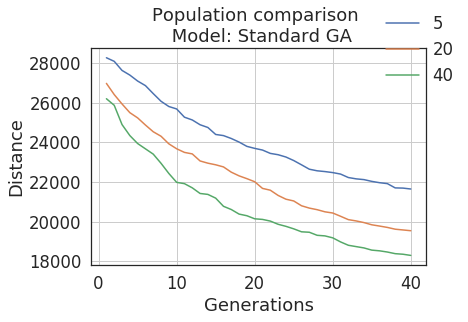

In [16]:
plotType = 'populations'
populationSizes = [5,  20, 40]
cityAlternatives = [24]
numberOfGenerations = 40
runs = 20
parentShare = 0.75
mutation = True
models = [False]
problem1 = SolveProblem(populationSizes, cityAlternatives, numberOfGenerations, runs,\
                        parentShare, mutation, models, plotType)

The picture when including all cities has some similarities with the 10 cities case: The mean best distance decreaes with the popultaion. On the other hand, the optimal generation number seems to be higher when there are more cities. That it takes more time to solve a more complex problem, is not surprising.<br>

## Hybrid models: Model comparison, 10 cities.
The following code solves the 10 city problem with different models (standard GA, Lamarck and Baldwin) using the solver and solution classes above.

#################################### Standard GA ###################################################
#Number of cities:  10
#Number of generations:  20 

#PopulationSize:  40
#Parent share:  0.75
#Mutation:  True
Minimum minimum over all runs  7486.3099999999995
Maximum minimum over all runs  8265.169999999998
Mean minimum over all runs  7772.759
Std minimum over all runs  165.23979139117768
Number of Distance evaluations:  640
Best route over all runs : 
 ['Hamburg' 'Brussels' 'Dublin' 'Barcelona' 'Belgrade' 'Istanbul'
 'Bucharest' 'Budapest' 'Berlin' 'Copenhagen'] 

#################################### Lamarck ###################################################
#Number of cities:  10
#Number of generations:  20 

#PopulationSize:  40
#Parent share:  0.75
#Mutation:  True
Minimum minimum over all runs  7486.3099999999995
Maximum minimum over all runs  7745.8
Mean minimum over all runs  7551.583500000001
Std minimum over all runs  80.2906538318748
Number of Distance evaluations:  3040


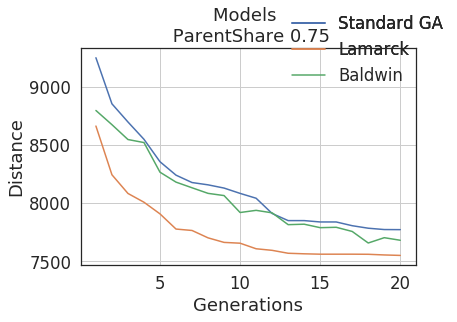

In [17]:
plotType = 'models'
populationSizes = [40]
cityAlternatives = [10]
numberOfGenerations = 20
runs = 20
parentShare = 0.75
mutation = True
models = [False, 'Lamarck', 'Baldwin']
problem1 = SolveProblem(populationSizes, cityAlternatives, numberOfGenerations, runs,\
                        parentShare, mutation, models, plotType)

We see that the rank of the models from best to worst goes from Lamarck to Baldwin. However, the Baldwin solution does not seem to have converged yet, so we cannot conclude anything about the final performance of the Baldwin model compared to the other models.<br>

## Hybrid models: Model comparison, 24 cities.
The following code soles the 24 city problem with different models (standard GA, Lamarck and Baldwin) using the solver and solution classes above.

#################################### Standard GA ###################################################
#Number of cities:  24
#Number of generations:  40 

#PopulationSize:  40
#Parent share:  0.75
#Mutation:  True
Minimum minimum over all runs  16707.16
Maximum minimum over all runs  21215.12
Mean minimum over all runs  18592.029
Std minimum over all runs  998.8651155731682
Number of Distance evaluations:  1240
Best route over all runs : 
 ['Brussels' 'Paris' 'London' 'Dublin' 'Berlin' 'Kiev' 'Moscow' 'Belgrade'
 'Rome' 'Barcelona' 'Madrid' 'Milan' 'Munich' 'Vienna' 'Istanbul' 'Sofia'
 'Bucharest' 'Budapest' 'Prague' 'Warsaw' 'Saint Petersburg' 'Stockholm'
 'Copenhagen' 'Hamburg'] 

#################################### Lamarck ###################################################
#Number of cities:  24
#Number of generations:  40 

#PopulationSize:  40
#Parent share:  0.75
#Mutation:  True
Minimum minimum over all runs  15338.220000000005
Maximum minimum over all runs  17896.510000000002


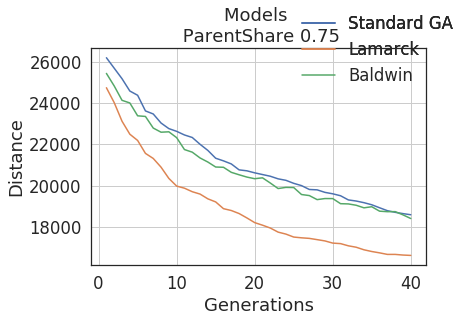

In [18]:
%matplotlib inline
plotType = 'models'
populationSizes = [40]
cityAlternatives = [24]
numberOfGenerations = 40
runs = 20
parentShare = .75
mutation = True
models = [False, 'Lamarck', 'Baldwin']
problem1 = SolveProblem(populationSizes, cityAlternatives, numberOfGenerations, runs,\
                        parentShare, mutation, models, plotType)

The ranking between the models is the same as for the 10 city case.<br>

Now none of the models have converged yet after 40 generations.

## Hybrid algorithms, number of evaluations, 24 cities
The number of evaluations is the times the distance of an individual is evaluated. Note that the numbers reported in the print out above reports the number of evaluations per run. From the print out above we see that the Lamarck and Baldwin model performs approximately 5 times the number of evaluation. However, it is uncertain as the whether compansating with more generations to make the number of evaluations in the simple GA comparable to the hybrid algorithms would make the simple GA reach solutions of the same quality as the hybrid algorithms. Non of the models above have converged, so we cannot conlcude about the relative performance of the models with more generation for the simple GA model.

# --------------------------------- NOT PART OF ASSIGNMENT  ---------------------------------
## Semi greedy (Shortest distance between 2 random cities)
### Semi-greedy. Function for the solver.

In [19]:
def greedy(cities):
    """ NOT PART OF ASSIGNMENT"""
    startTime = time.time()
    route = []
    startCity = random.choice(cities)
    route.append(startCity)
    index2Delete = np.argwhere(cities==startCity)
    remainingCities = np.delete(cities, index2Delete)
    distance = 0
    while remainingCities.size:
        if len(remainingCities) != 1:
            alternativeCities = random.sample(set(remainingCities), 2)
            candidateIndices = np.zeros(len(alternativeCities))
            lengths = np.zeros_like(candidateIndices)

            for candidate in range(len(alternativeCities)):
                candidateIndices[candidate] = np.concatenate(np.where(cityNames == alternativeCities[candidate]))
                lengths[candidate] = df[route[-1]][candidateIndices[candidate]]#.values

            if lengths[0] > lengths[1]:
                nextCity = alternativeCities[0]
                nextLength = lengths[0]
            else:
                nextCity = alternativeCities[1]
                nextLength = lengths[1]

            route.append(nextCity)
            index2Delete = np.argwhere(remainingCities==nextCity)
            remainingCities = np.delete(remainingCities, index2Delete)
            distance += nextLength

        else:
            nextCity = remainingCities[0]
            candidateIndex = np.concatenate(np.where(cityNames == nextCity))
            nextLength = df[route[-1]][candidateIndex].values
            distance += nextLength
            route.append(nextCity)
            remainingCities = np.array(())
    startCityIndex = np.concatenate(np.argwhere(cityNames==startCity))
    nextLength = df[route[-1]][startCityIndex].values
    distance += nextLength
    route.append(startCity)

    endTime = time.time()
    timeUsed = endTime - startTime

    return route, distance, timeUsed

### Semi-greedy. Solution

In [20]:
maxNumberOfCitiesList = [10, 24]
for maxNumberOfCities in maxNumberOfCitiesList:
    cities = cityNames[0:maxNumberOfCities]

    numberOfSimulations = 20
    distances = np.zeros(numberOfSimulations)
    routes = []
    times = []
    #hillC = TSP()

    for i in range(numberOfSimulations):
        route, distance, timeUsed = greedy(cities)
        routes.append(route)
        distances[i] = distance
        times.append(timeUsed)

    print('Number of cities: ', maxNumberOfCities)
    minDistance = np.min(distances)
    print('Minimum ', minDistance)
    maxDistance = np.max(distances)
    print('Maximum ', maxDistance)
    meanDistance = np.mean(distances)
    print('Mean ', meanDistance)
    stdDistance = np.std(distances)
    print('Std ', stdDistance)

    minDistanceIndex = np.concatenate(np.argwhere(distances == minDistance))
    print('Best route: ', routes[minDistanceIndex[0]], '\n')
    #print('Minimum time: ', times[minDistanceIndex[0]])

Number of cities:  10
Minimum  14318.830000000002
Maximum  16188.480000000003
Mean  15311.285999999998
Std  533.5963254970932
Best route:  ['Barcelona', 'Dublin', 'Belgrade', 'Berlin', 'Brussels', 'Budapest', 'Istanbul', 'Hamburg', 'Bucharest', 'Copenhagen', 'Barcelona'] 

Number of cities:  24
Minimum  31654.280000000002
Maximum  39386.950000000004
Mean  35999.285
Std  1668.2380948189011
Best route:  ['Stockholm', 'Munich', 'Hamburg', 'Dublin', 'Barcelona', 'Kiev', 'Prague', 'Belgrade', 'Warsaw', 'Brussels', 'Moscow', 'Sofia', 'Istanbul', 'London', 'Madrid', 'Vienna', 'Copenhagen', 'Saint Petersburg', 'Bucharest', 'Milan', 'Berlin', 'Paris', 'Budapest', 'Rome', 'Stockholm'] 



### Semi-greedy: Interpreation.
The exhastive seach found a distance of 7 486 for 10 cities, while the semi greedy algorith is at best around 50 per cent higher. <br>

The semi greedy algorith is extremely much faster than exhaustive search, solving both city cases in seconds. In comparison the exhaustive search would take over a million years solving the 24 city problem.